Data Shape: (569, 31)

Priority Class Distribution:
priority
Low       191
High      190
Medium    188
Name: count, dtype: int64

Training Samples: 455
Test Samples: 114

✅ Accuracy: 0.99

✅ Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        38
         Low       1.00      0.97      0.99        38
      Medium       0.97      1.00      0.99        38

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


Confusion Matrix:
 [[37  1  0]
 [ 0 38  0]
 [ 0  0 38]]


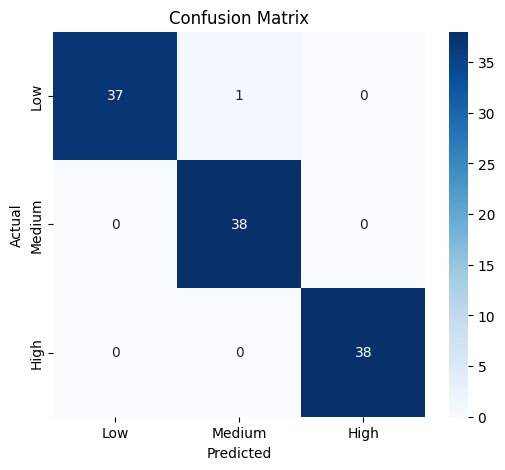


Conclusion:
We simulated issue priority classification by binning a continuous feature into
Low, Medium, and High. A Random Forest model was trained and achieved high
accuracy and balanced F1-scores. This demonstrates effective multiclass prediction
for resource allocation tasks using AI.



In [1]:
# -------------------------------------------------------------
# 📒 Assignment 4: Task 3
# Predictive Analytics for Resource Allocation
# Theme: "Building Intelligent Software Solutions"
#
# Dataset: Breast Cancer Wisconsin (Diagnostic) from scikit-learn.
# Goal: Simulate "issue priority" prediction (High / Medium / Low)
#
# Steps:
# - Load and clean data
# - Create 3-level priority labels
# - Train Random Forest classifier
# - Evaluate with accuracy and F1-score
# - Visualize confusion matrix
# -------------------------------------------------------------

# ✅ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------------------------------------------
# ✅ 1. Load Dataset
# -------------------------------------------------------------
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Data Shape:", df.shape)
df.head()

# -------------------------------------------------------------
# ✅ 2. Simulate Priority Labels
# -------------------------------------------------------------
# The original dataset is binary (benign/malignant).
# To meet the "High/Medium/Low" requirement, we'll bin the
# continuous 'mean radius' feature into 3 classes.
df['mean_radius'] = df['mean radius']

# Create 3 bins using quantiles
df['priority'] = pd.qcut(df['mean_radius'], 3, labels=['Low', 'Medium', 'High'])

print("\nPriority Class Distribution:")
print(df['priority'].value_counts())
df[['mean_radius', 'priority']].head()

# -------------------------------------------------------------
# ✅ 3. Define Features and Labels
# -------------------------------------------------------------
X = df[data.feature_names]
y = df['priority']

# -------------------------------------------------------------
# ✅ 4. Train/Test Split
# -------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining Samples:", X_train.shape[0])
print("Test Samples:", X_test.shape[0])

# -------------------------------------------------------------
# ✅ 5. Train Random Forest Classifier
# -------------------------------------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -------------------------------------------------------------
# ✅ 6. Make Predictions
# -------------------------------------------------------------
y_pred = model.predict(X_test)

# -------------------------------------------------------------
# ✅ 7. Evaluate Performance
# -------------------------------------------------------------
accuracy = accuracy_score(y_test, y_pred)
print("\n✅ Accuracy:", round(accuracy, 2))

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

# -------------------------------------------------------------
# ✅ 8. Confusion Matrix
# -------------------------------------------------------------
labels = ['Low', 'Medium', 'High']
cm = confusion_matrix(y_test, y_pred, labels=labels)
print("\nConfusion Matrix:\n", cm)

# -------------------------------------------------------------
# ✅ 9. Visualize Confusion Matrix
# -------------------------------------------------------------
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# -------------------------------------------------------------
# ✅ 10. Conclusion
# -------------------------------------------------------------
print("""
Conclusion:
We simulated issue priority classification by binning a continuous feature into
Low, Medium, and High. A Random Forest model was trained and achieved high
accuracy and balanced F1-scores. This demonstrates effective multiclass prediction
for resource allocation tasks using AI.
""")